**Mounting Drive**

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Paths**

In [38]:
test_path = '/content/drive/MyDrive/Data/test'
train_path = '/content/drive/MyDrive/Data/train'
test_metaData = '/content/drive/MyDrive/FYP-METADATA'
train_metaData = '/content/drive/MyDrive/FYP-METADATA'

**Importing libraries**

In [39]:
import os
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import pandas as pd
import numpy as np
import logging

Setting Path For MetaData

In [40]:
p1Test=pd.read_csv(test_metaData+"/protocol1Test_metaData.csv")
p1Train=pd.read_csv(test_metaData+"/protocol1Train_metaData.csv")

Test directories

In [41]:
directory_list_test = list()
# OS. walk() generate the file names in a directory tree by walking the tree either top-down or bottom-up.
for root, dirs, files in os.walk(test_path, topdown=False):
    print("direc",dirs)
    for name in dirs:
        directory_list_test.append(os.path.join(root, name))
directory_list_test.pop()
print (directory_list_test)

direc []
direc []
direc ['spoof', 'live']
direc ['10027']
['/content/drive/MyDrive/Data/test/10027/spoof', '/content/drive/MyDrive/Data/test/10027/live']


Train directories

In [42]:
directory_list_train = list()
for root, dirs, files in os.walk(train_path, topdown=False):
    for name in dirs:
        directory_list_train.append(os.path.join(root, name))
directory_list_train.pop()
directory_list_train.pop()
print (directory_list_train)

['/content/drive/MyDrive/Data/train/2/spoof', '/content/drive/MyDrive/Data/train/2/live', '/content/drive/MyDrive/Data/train/1/spoof', '/content/drive/MyDrive/Data/train/1/live']


   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


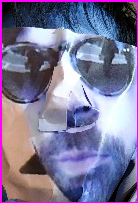

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


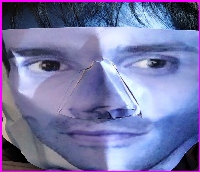

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


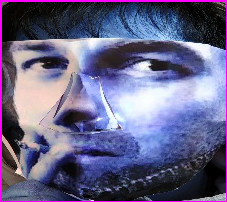

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


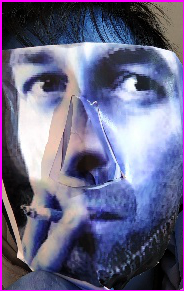

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


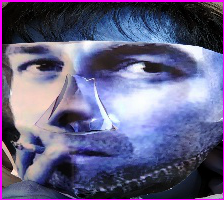

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


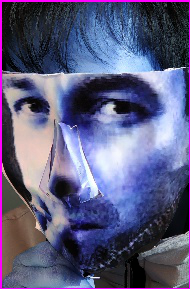

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


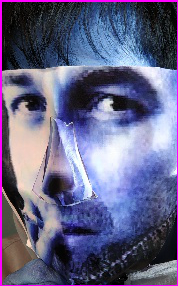

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


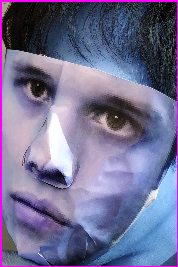

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


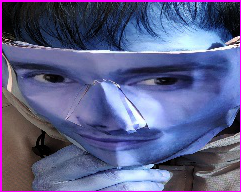

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


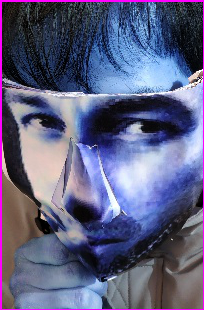

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


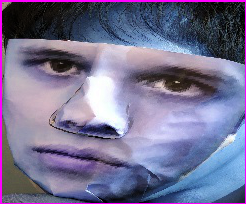

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


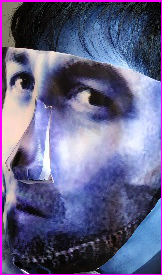

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


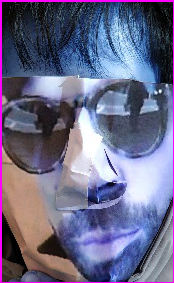

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


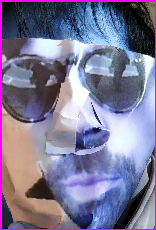

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


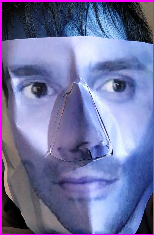

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


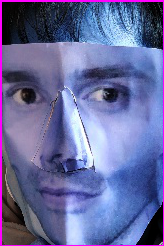

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


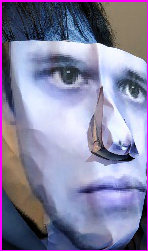

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


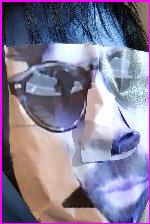

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


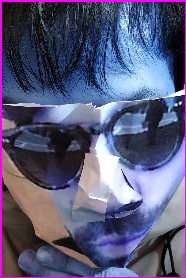

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


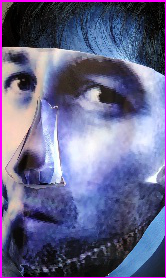

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


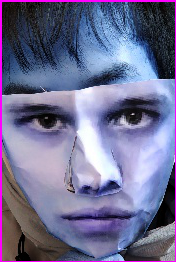

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


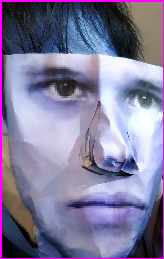

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


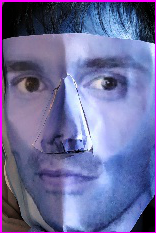

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


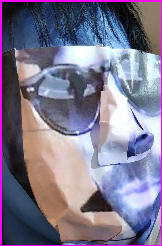

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


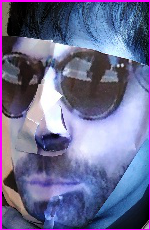

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


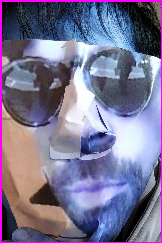

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


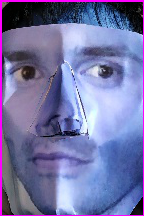

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


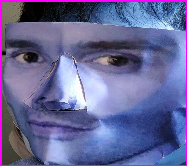

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


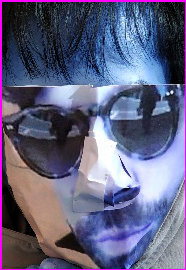

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


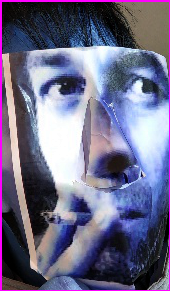

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


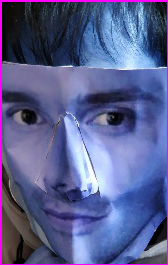

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


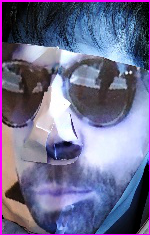

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


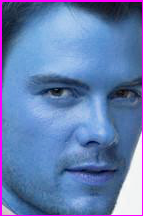

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


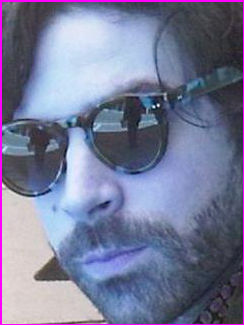

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


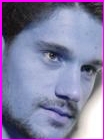

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


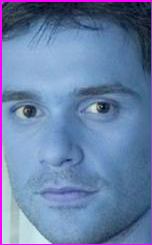

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


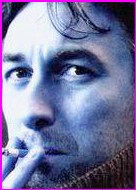

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


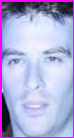

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


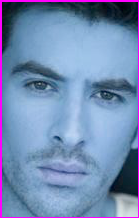

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


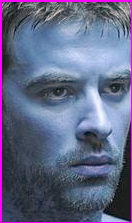

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


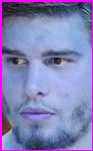

   spoofType  illuminationCondition  environment  isSpoof
0          4                      2            2        1


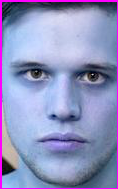

In [54]:
for o in directory_list_test:
  files_list = os.listdir(o)
  
  for y in files_list:
    if (".png") in y:
      
      image_url = o+"/"+y
      a = y.strip(".png")
      
      x=image_url.replace("/content/drive/MyDrive/",'')

      d=p1Test.loc[p1Test['path'] == "Data/test/6964/spoof/494405.png"]
      print(d[['spoofType', 'illuminationCondition', 'environment', 'isSpoof']])

      i = a+"_BB.txt"
      text_url = o+"/"+i

      f = open(text_url, "r")
      for line in f:
        data = line.split()

      image_path = io.imread(image_url)
      
      real_h,real_w,c = image_path.shape

      w = int(float(data[2]))
      h = int(float(data[3]))
      x = int(float(data[0]))
      y = int(float(data[1]))

      w = int(w*(real_w / 224))
      h = int(h*(real_h / 224))
      x = int(x*(real_w / 224))
      y = int(y*(real_h / 224))

      cv.rectangle(image_path, (x, y), (x + w, y + h), (255,0,255), 2)
     
      y1 = 0 if y < 0 else y
      x1 = 0 if x < 0 else x 
      y2 = real_h if y1 + h > real_h else y + h
      x2 = real_w if x1 + w > real_w else x + w
      image_path = image_path[y1:y2,x1:x2,:]
      cv2_imshow(image_path)

In [44]:
)p1Test.head()

path  spoofType  illuminationCondition  \
0  Data/test/6964/spoof/494405.png          4                      2   
1  Data/test/6407/spoof/494411.png          3                      1   
2  Data/test/6153/spoof/494412.png          3                      1   
3   Data/test/6411/live/494418.png          0                      0   
4  Data/test/6336/spoof/494419.png          3                      1   

   environment  isSpoof  
0            2        1  
1            2        1  
2            1        1  
3            0        0  
4            1        1